### Pneumonia Classification
- Find the dataset here https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
- spoiler: Please don't run CNN models on your sytems unless met with system requirements -- minimum > 8GB RAM(for me it ate 5 hours)

In [64]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import gc

Normal image size : (1858, 2090, 3)


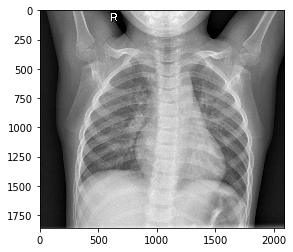

Pnemonia image size : (650, 1028, 3)


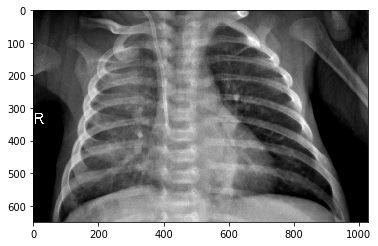

In [65]:
# to check image size
img_path_normal = 'D:\\Pneumonia img\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg'
img_path_pneumonia = 'D:\\Pneumonia img\\chest_xray\\train\\PNEUMONIA\\person10_bacteria_43.jpeg'

Normal_img = cv2.imread(img_path_normal) 
Pneumonia_img = cv2.imread(img_path_pneumonia)
print('Normal image size : {}'.format(Normal_img.shape))
plt.imshow(Normal_img, cmap = 'gray')
plt.show()
print('Pnemonia image size : {}'.format(Pneumonia_img.shape))
plt.imshow(Pneumonia_img, cmap = 'gray')
plt.show()

In [66]:
#base image path in kaggle env
BASE_IMAGE_PATH ='D:/Pneumonia img/chest_xray'
#Reshape input images to 200x200, free to be changed
IMG_SIZE=200

In [67]:
BASE_IMAGE_PATH

'D:/Pneumonia img/chest_xray'

In [68]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




In [6]:
# preparing training and test sets

a ='D:\\Pneumonia img\\chest_xray\\train'
training_set = train_datagen.flow_from_directory(a,
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

b ='D:\\Pneumonia img\\chest_xray\\test'
test_set = test_datagen.flow_from_directory(b,
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
training_set.image_shape        

(200, 200, 3)

In [8]:
test_set.image_shape

(200, 200, 3)

In [9]:
training_set.class_indices  

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
training_set.data_format

'channels_last'

In [11]:
training_set.dtype

'float32'

In [12]:
training_set.labels

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
training_set.samples

5216

In [14]:
training_set.target_size

(200, 200)

### CNN Model
- Examples of CNN model

- Example 1

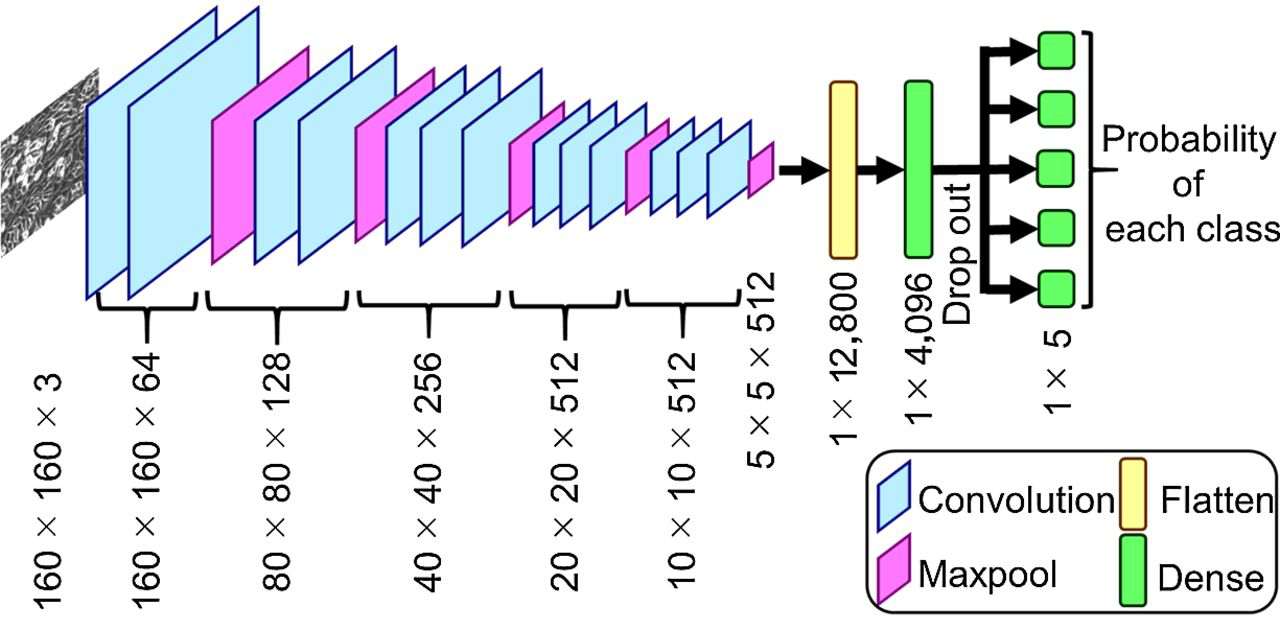

In [3]:
from PIL import Image
img = Image.open('c1.jpg')
img

- Example 2

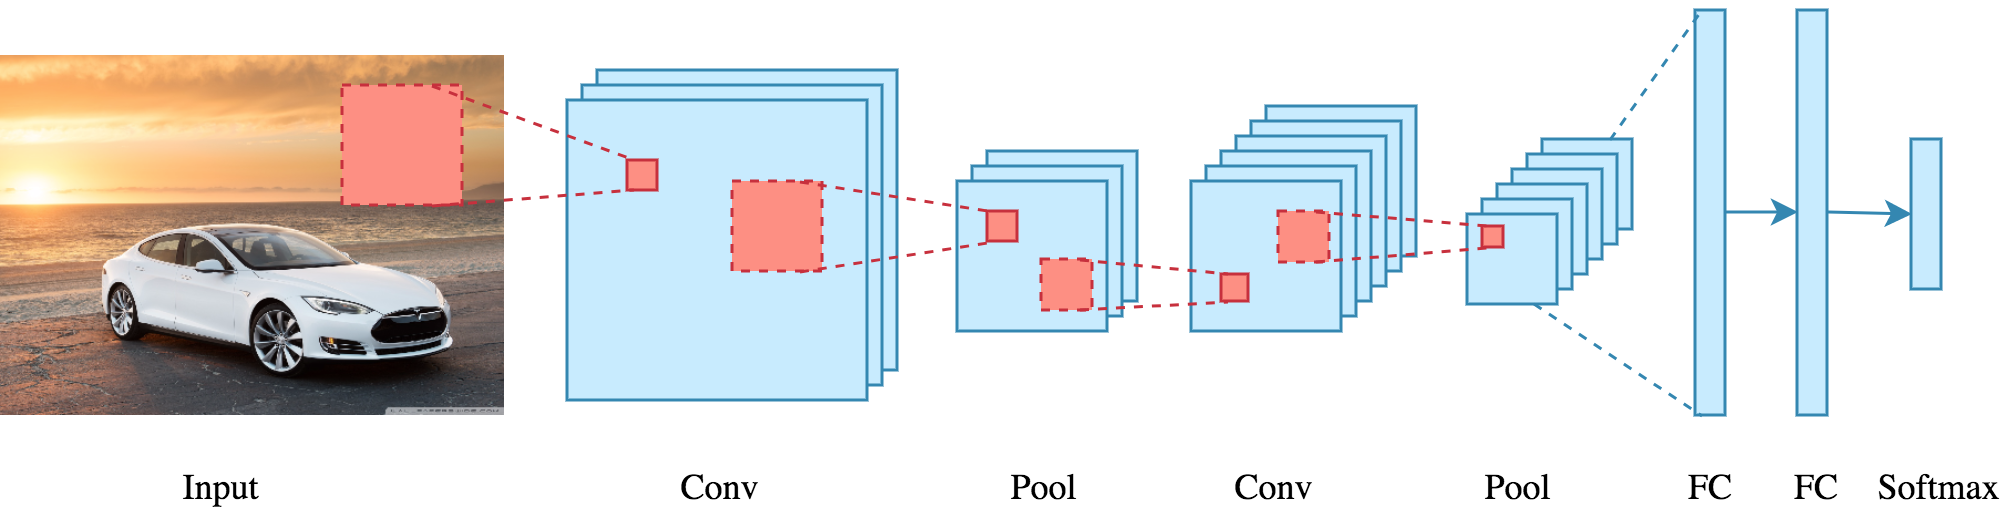

In [5]:
img2 = Image.open('c2.png')
img2

- Example 3

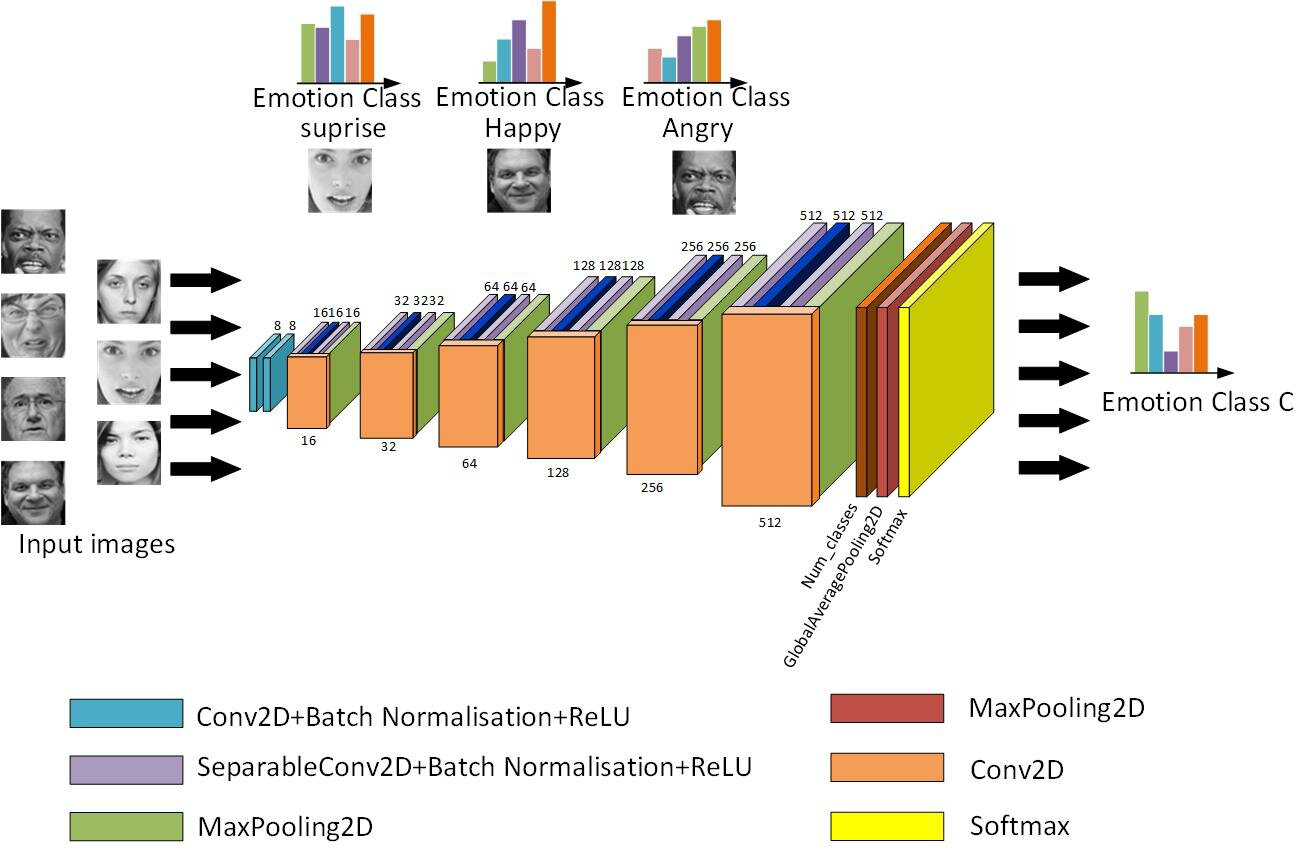

In [7]:
img3 = Image.open('c3.jpg')
img3

- My model layers:

    - conv(32)
    - maxpool(2,2)
    - conv(64)
    - maxpool(2,2)
    - flatten()
    - Dense(128)
    - Dense(1)

- Note : you can choose the layer structure from different **deep learning architectures**

In [15]:
# initializing CNN
classifier = Sequential()

# convolution layer 1
classifier.add(Conv2D(filters = 32, kernel_size = (3,3) , input_shape = (200,200,3), activation = 'relu'))

# pooling layer 1
classifier.add(MaxPool2D(pool_size = (2,2)))

# convolution layer 2
classifier.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# pooling layer 2
classifier.add(MaxPool2D(pool_size = (2,2)))

# flattening layer
classifier.add(Flatten())

# fully connected layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compile the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

### Fitting the CNN model

In [17]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100)


Epoch 1/25
50/50 [==============================] - 243s 5s/step - loss: 0.6500 - accuracy: 0.7881 - val_loss: 0.5948 - val_accuracy: 0.7388
Epoch 2/25
50/50 [==============================] - 223s 4s/step - loss: 0.2903 - accuracy: 0.8750 - val_loss: 0.3810 - val_accuracy: 0.8029
Epoch 3/25
50/50 [==============================] - 222s 4s/step - loss: 0.2574 - accuracy: 0.8956 - val_loss: 0.1796 - val_accuracy: 0.8317
Epoch 4/25
50/50 [==============================] - 191s 4s/step - loss: 0.2224 - accuracy: 0.9081 - val_loss: 1.5212 - val_accuracy: 0.6843
Epoch 5/25
50/50 [==============================] - 178s 4s/step - loss: 0.2482 - accuracy: 0.9025 - val_loss: 0.3751 - val_accuracy: 0.7869
Epoch 6/25
50/50 [==============================] - 178s 4s/step - loss: 0.1956 - accuracy: 0.9137 - val_loss: 0.2933 - val_accuracy: 0.8558
Epoch 7/25
50/50 [==============================] - 178s 4s/step - loss: 0.2216 - accuracy: 0.9156 - val_loss: 0.3748 - val_accuracy: 0.8333
Epoch 8/25
5

### Predictions on CNN model

In [58]:
# prepare the image paths
img_normal_testing = 'D:\\Pneumonia img\\chest_xray\\test\\NORMAL\\IM-0011-0001-0001.jpeg'
img_pneumonia_testing = 'D:\\Pneumonia img\\chest_xray\\test\\PNEUMONIA\\person157_bacteria_740.jpeg'

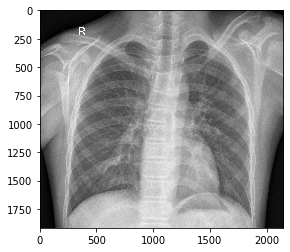

In [59]:
img = cv2.imread(img_normal_testing)
plt.imshow(img, cmap= 'gray')
plt.show()

In [60]:
from keras.preprocessing.image import img_to_array

img = cv2.imread(img_normal_testing)
img = cv2.resize(img, (200,200))
img = np.array(img)
img = img[np.newaxis, :, :, :]
img = img.astype('float32')
img = img / 255.0

In [61]:
img.shape

(1, 200, 200, 3)

### Prediction for normal image

In [62]:
result = classifier.predict_classes(img)

In [63]:
result

array([[0]])

### Prediction for Pneumonia image

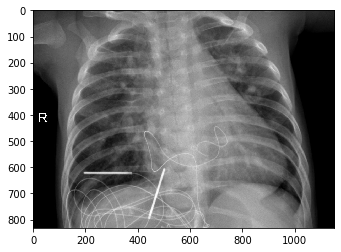

In [55]:
img = cv2.imread(img_pneumonia_testing)
plt.imshow(img, cmap= 'gray')
plt.show()

In [56]:
from keras.preprocessing.image import img_to_array

img = cv2.imread(img_pneumonia_testing)
img = cv2.resize(img, (200,200))
img = np.array(img)
img = img[np.newaxis, :, :, :]
img = img.astype('float32')
img = img / 255.0

In [57]:
result = classifier.predict_classes(img)
result

array([[1]])